# Exloratory data analysis


In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import Markdown, display

#### Uploading data


In [68]:
Path = "data/"

circuits = pd.read_csv(Path + "circuits.csv")
constructor_results = pd.read_csv(Path + "constructor_results.csv")
constructor_standings = pd.read_csv(Path + "constructor_standings.csv")
constructors = pd.read_csv(Path + "constructors.csv")
driver_standings = pd.read_csv(Path + "driver_standings.csv")
drivers = pd.read_csv(Path + "drivers.csv")
lap_times = pd.read_csv(Path + "lap_times.csv")
pit_stops = pd.read_csv(Path + "pit_stops.csv")
qualifying = pd.read_csv(Path + "qualifying.csv")
races = pd.read_csv(Path + "races.csv")
results = pd.read_csv(Path + "results.csv")
seasons = pd.read_csv(Path + "seasons.csv")
sprint_results = pd.read_csv(Path + "sprint_results.csv")
status = pd.read_csv(Path + "status.csv")

### circuits


In [69]:
print(circuits.info())
circuits.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   circuitId   77 non-null     int64  
 1   circuitRef  77 non-null     object 
 2   name        77 non-null     object 
 3   location    77 non-null     object 
 4   country     77 non-null     object 
 5   lat         77 non-null     float64
 6   lng         77 non-null     float64
 7   alt         77 non-null     object 
 8   url         77 non-null     object 
dtypes: float64(2), int64(1), object(6)
memory usage: 5.5+ KB
None


,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park


In [70]:
print(
    "There are",
    len(circuits["country"]),
    "circuits, in ",
    len(pd.unique(circuits["country"])),
    " different countries.",
)


There are 77 circuits, in  35  different countries.


**We found svgs for some of the circuits.**

In [71]:
# show the first location
location = circuits["country"][0].lower()

get_github_link = (
    lambda country: f"https://raw.githubusercontent.com/f1laps/f1-track-vectors/main/f1_2020/{country}.svg"
)

innerhtml = ""

for location in circuits["country"]:
    location = location.lower()

    innerhtml += f"""<div><p>Track location: {location}</p><p>Track svg: <img src="{get_github_link(location)}" width="50" height="50"> </p></div>"""

html = f"""<div style="display: grid; grid-template-columns: 1fr 1fr 1fr 1fr;">{innerhtml}</div>"""

display(Markdown(html))

<div style="display: grid; grid-template-columns: 1fr 1fr 1fr 1fr;"><div><p>Track location: australia</p><p>Track svg: <img src="https://raw.githubusercontent.com/f1laps/f1-track-vectors/main/f1_2020/australia.svg" width="50" height="50"> </p></div><div><p>Track location: malaysia</p><p>Track svg: <img src="https://raw.githubusercontent.com/f1laps/f1-track-vectors/main/f1_2020/malaysia.svg" width="50" height="50"> </p></div><div><p>Track location: bahrain</p><p>Track svg: <img src="https://raw.githubusercontent.com/f1laps/f1-track-vectors/main/f1_2020/bahrain.svg" width="50" height="50"> </p></div><div><p>Track location: spain</p><p>Track svg: <img src="https://raw.githubusercontent.com/f1laps/f1-track-vectors/main/f1_2020/spain.svg" width="50" height="50"> </p></div><div><p>Track location: turkey</p><p>Track svg: <img src="https://raw.githubusercontent.com/f1laps/f1-track-vectors/main/f1_2020/turkey.svg" width="50" height="50"> </p></div><div><p>Track location: monaco</p><p>Track svg: <img src="https://raw.githubusercontent.com/f1laps/f1-track-vectors/main/f1_2020/monaco.svg" width="50" height="50"> </p></div><div><p>Track location: canada</p><p>Track svg: <img src="https://raw.githubusercontent.com/f1laps/f1-track-vectors/main/f1_2020/canada.svg" width="50" height="50"> </p></div><div><p>Track location: france</p><p>Track svg: <img src="https://raw.githubusercontent.com/f1laps/f1-track-vectors/main/f1_2020/france.svg" width="50" height="50"> </p></div><div><p>Track location: uk</p><p>Track svg: <img src="https://raw.githubusercontent.com/f1laps/f1-track-vectors/main/f1_2020/uk.svg" width="50" height="50"> </p></div><div><p>Track location: germany</p><p>Track svg: <img src="https://raw.githubusercontent.com/f1laps/f1-track-vectors/main/f1_2020/germany.svg" width="50" height="50"> </p></div><div><p>Track location: hungary</p><p>Track svg: <img src="https://raw.githubusercontent.com/f1laps/f1-track-vectors/main/f1_2020/hungary.svg" width="50" height="50"> </p></div><div><p>Track location: spain</p><p>Track svg: <img src="https://raw.githubusercontent.com/f1laps/f1-track-vectors/main/f1_2020/spain.svg" width="50" height="50"> </p></div><div><p>Track location: belgium</p><p>Track svg: <img src="https://raw.githubusercontent.com/f1laps/f1-track-vectors/main/f1_2020/belgium.svg" width="50" height="50"> </p></div><div><p>Track location: italy</p><p>Track svg: <img src="https://raw.githubusercontent.com/f1laps/f1-track-vectors/main/f1_2020/italy.svg" width="50" height="50"> </p></div><div><p>Track location: singapore</p><p>Track svg: <img src="https://raw.githubusercontent.com/f1laps/f1-track-vectors/main/f1_2020/singapore.svg" width="50" height="50"> </p></div><div><p>Track location: japan</p><p>Track svg: <img src="https://raw.githubusercontent.com/f1laps/f1-track-vectors/main/f1_2020/japan.svg" width="50" height="50"> </p></div><div><p>Track location: china</p><p>Track svg: <img src="https://raw.githubusercontent.com/f1laps/f1-track-vectors/main/f1_2020/china.svg" width="50" height="50"> </p></div><div><p>Track location: brazil</p><p>Track svg: <img src="https://raw.githubusercontent.com/f1laps/f1-track-vectors/main/f1_2020/brazil.svg" width="50" height="50"> </p></div><div><p>Track location: usa</p><p>Track svg: <img src="https://raw.githubusercontent.com/f1laps/f1-track-vectors/main/f1_2020/usa.svg" width="50" height="50"> </p></div><div><p>Track location: germany</p><p>Track svg: <img src="https://raw.githubusercontent.com/f1laps/f1-track-vectors/main/f1_2020/germany.svg" width="50" height="50"> </p></div><div><p>Track location: italy</p><p>Track svg: <img src="https://raw.githubusercontent.com/f1laps/f1-track-vectors/main/f1_2020/italy.svg" width="50" height="50"> </p></div><div><p>Track location: japan</p><p>Track svg: <img src="https://raw.githubusercontent.com/f1laps/f1-track-vectors/main/f1_2020/japan.svg" width="50" height="50"> </p></div><div><p>Track location: united states</p><p>Track svg: <img src="https://raw.githubusercontent.com/f1laps/f1-track-vectors/main/f1_2020/united states.svg" width="50" height="50"> </p></div><div><p>Track location: uae</p><p>Track svg: <img src="https://raw.githubusercontent.com/f1laps/f1-track-vectors/main/f1_2020/uae.svg" width="50" height="50"> </p></div><div><p>Track location: argentina</p><p>Track svg: <img src="https://raw.githubusercontent.com/f1laps/f1-track-vectors/main/f1_2020/argentina.svg" width="50" height="50"> </p></div><div><p>Track location: spain</p><p>Track svg: <img src="https://raw.githubusercontent.com/f1laps/f1-track-vectors/main/f1_2020/spain.svg" width="50" height="50"> </p></div><div><p>Track location: portugal</p><p>Track svg: <img src="https://raw.githubusercontent.com/f1laps/f1-track-vectors/main/f1_2020/portugal.svg" width="50" height="50"> </p></div><div><p>Track location: japan</p><p>Track svg: <img src="https://raw.githubusercontent.com/f1laps/f1-track-vectors/main/f1_2020/japan.svg" width="50" height="50"> </p></div><div><p>Track location: australia</p><p>Track svg: <img src="https://raw.githubusercontent.com/f1laps/f1-track-vectors/main/f1_2020/australia.svg" width="50" height="50"> </p></div><div><p>Track location: south africa</p><p>Track svg: <img src="https://raw.githubusercontent.com/f1laps/f1-track-vectors/main/f1_2020/south africa.svg" width="50" height="50"> </p></div><div><p>Track location: uk</p><p>Track svg: <img src="https://raw.githubusercontent.com/f1laps/f1-track-vectors/main/f1_2020/uk.svg" width="50" height="50"> </p></div><div><p>Track location: mexico</p><p>Track svg: <img src="https://raw.githubusercontent.com/f1laps/f1-track-vectors/main/f1_2020/mexico.svg" width="50" height="50"> </p></div><div><p>Track location: usa</p><p>Track svg: <img src="https://raw.githubusercontent.com/f1laps/f1-track-vectors/main/f1_2020/usa.svg" width="50" height="50"> </p></div><div><p>Track location: france</p><p>Track svg: <img src="https://raw.githubusercontent.com/f1laps/f1-track-vectors/main/f1_2020/france.svg" width="50" height="50"> </p></div><div><p>Track location: korea</p><p>Track svg: <img src="https://raw.githubusercontent.com/f1laps/f1-track-vectors/main/f1_2020/korea.svg" width="50" height="50"> </p></div><div><p>Track location: brazil</p><p>Track svg: <img src="https://raw.githubusercontent.com/f1laps/f1-track-vectors/main/f1_2020/brazil.svg" width="50" height="50"> </p></div><div><p>Track location: usa</p><p>Track svg: <img src="https://raw.githubusercontent.com/f1laps/f1-track-vectors/main/f1_2020/usa.svg" width="50" height="50"> </p></div><div><p>Track location: uk</p><p>Track svg: <img src="https://raw.githubusercontent.com/f1laps/f1-track-vectors/main/f1_2020/uk.svg" width="50" height="50"> </p></div><div><p>Track location: netherlands</p><p>Track svg: <img src="https://raw.githubusercontent.com/f1laps/f1-track-vectors/main/f1_2020/netherlands.svg" width="50" height="50"> </p></div><div><p>Track location: belgium</p><p>Track svg: <img src="https://raw.githubusercontent.com/f1laps/f1-track-vectors/main/f1_2020/belgium.svg" width="50" height="50"> </p></div><div><p>Track location: france</p><p>Track svg: <img src="https://raw.githubusercontent.com/f1laps/f1-track-vectors/main/f1_2020/france.svg" width="50" height="50"> </p></div><div><p>Track location: usa</p><p>Track svg: <img src="https://raw.githubusercontent.com/f1laps/f1-track-vectors/main/f1_2020/usa.svg" width="50" height="50"> </p></div><div><p>Track location: usa</p><p>Track svg: <img src="https://raw.githubusercontent.com/f1laps/f1-track-vectors/main/f1_2020/usa.svg" width="50" height="50"> </p></div><div><p>Track location: usa</p><p>Track svg: <img src="https://raw.githubusercontent.com/f1laps/f1-track-vectors/main/f1_2020/usa.svg" width="50" height="50"> </p></div><div><p>Track location: spain</p><p>Track svg: <img src="https://raw.githubusercontent.com/f1laps/f1-track-vectors/main/f1_2020/spain.svg" width="50" height="50"> </p></div><div><p>Track location: usa</p><p>Track svg: <img src="https://raw.githubusercontent.com/f1laps/f1-track-vectors/main/f1_2020/usa.svg" width="50" height="50"> </p></div><div><p>Track location: sweden</p><p>Track svg: <img src="https://raw.githubusercontent.com/f1laps/f1-track-vectors/main/f1_2020/sweden.svg" width="50" height="50"> </p></div><div><p>Track location: canada</p><p>Track svg: <img src="https://raw.githubusercontent.com/f1laps/f1-track-vectors/main/f1_2020/canada.svg" width="50" height="50"> </p></div><div><p>Track location: spain</p><p>Track svg: <img src="https://raw.githubusercontent.com/f1laps/f1-track-vectors/main/f1_2020/spain.svg" width="50" height="50"> </p></div><div><p>Track location: belgium</p><p>Track svg: <img src="https://raw.githubusercontent.com/f1laps/f1-track-vectors/main/f1_2020/belgium.svg" width="50" height="50"> </p></div><div><p>Track location: france</p><p>Track svg: <img src="https://raw.githubusercontent.com/f1laps/f1-track-vectors/main/f1_2020/france.svg" width="50" height="50"> </p></div><div><p>Track location: canada</p><p>Track svg: <img src="https://raw.githubusercontent.com/f1laps/f1-track-vectors/main/f1_2020/canada.svg" width="50" height="50"> </p></div><div><p>Track location: france</p><p>Track svg: <img src="https://raw.githubusercontent.com/f1laps/f1-track-vectors/main/f1_2020/france.svg" width="50" height="50"> </p></div><div><p>Track location: france</p><p>Track svg: <img src="https://raw.githubusercontent.com/f1laps/f1-track-vectors/main/f1_2020/france.svg" width="50" height="50"> </p></div><div><p>Track location: france</p><p>Track svg: <img src="https://raw.githubusercontent.com/f1laps/f1-track-vectors/main/f1_2020/france.svg" width="50" height="50"> </p></div><div><p>Track location: south africa</p><p>Track svg: <img src="https://raw.githubusercontent.com/f1laps/f1-track-vectors/main/f1_2020/south africa.svg" width="50" height="50"> </p></div><div><p>Track location: austria</p><p>Track svg: <img src="https://raw.githubusercontent.com/f1laps/f1-track-vectors/main/f1_2020/austria.svg" width="50" height="50"> </p></div><div><p>Track location: uk</p><p>Track svg: <img src="https://raw.githubusercontent.com/f1laps/f1-track-vectors/main/f1_2020/uk.svg" width="50" height="50"> </p></div><div><p>Track location: portugal</p><p>Track svg: <img src="https://raw.githubusercontent.com/f1laps/f1-track-vectors/main/f1_2020/portugal.svg" width="50" height="50"> </p></div><div><p>Track location: usa</p><p>Track svg: <img src="https://raw.githubusercontent.com/f1laps/f1-track-vectors/main/f1_2020/usa.svg" width="50" height="50"> </p></div><div><p>Track location: germany</p><p>Track svg: <img src="https://raw.githubusercontent.com/f1laps/f1-track-vectors/main/f1_2020/germany.svg" width="50" height="50"> </p></div><div><p>Track location: portugal</p><p>Track svg: <img src="https://raw.githubusercontent.com/f1laps/f1-track-vectors/main/f1_2020/portugal.svg" width="50" height="50"> </p></div><div><p>Track location: usa</p><p>Track svg: <img src="https://raw.githubusercontent.com/f1laps/f1-track-vectors/main/f1_2020/usa.svg" width="50" height="50"> </p></div><div><p>Track location: morocco</p><p>Track svg: <img src="https://raw.githubusercontent.com/f1laps/f1-track-vectors/main/f1_2020/morocco.svg" width="50" height="50"> </p></div><div><p>Track location: italy</p><p>Track svg: <img src="https://raw.githubusercontent.com/f1laps/f1-track-vectors/main/f1_2020/italy.svg" width="50" height="50"> </p></div><div><p>Track location: switzerland</p><p>Track svg: <img src="https://raw.githubusercontent.com/f1laps/f1-track-vectors/main/f1_2020/switzerland.svg" width="50" height="50"> </p></div><div><p>Track location: spain</p><p>Track svg: <img src="https://raw.githubusercontent.com/f1laps/f1-track-vectors/main/f1_2020/spain.svg" width="50" height="50"> </p></div><div><p>Track location: india</p><p>Track svg: <img src="https://raw.githubusercontent.com/f1laps/f1-track-vectors/main/f1_2020/india.svg" width="50" height="50"> </p></div><div><p>Track location: usa</p><p>Track svg: <img src="https://raw.githubusercontent.com/f1laps/f1-track-vectors/main/f1_2020/usa.svg" width="50" height="50"> </p></div><div><p>Track location: austria</p><p>Track svg: <img src="https://raw.githubusercontent.com/f1laps/f1-track-vectors/main/f1_2020/austria.svg" width="50" height="50"> </p></div><div><p>Track location: russia</p><p>Track svg: <img src="https://raw.githubusercontent.com/f1laps/f1-track-vectors/main/f1_2020/russia.svg" width="50" height="50"> </p></div><div><p>Track location: azerbaijan</p><p>Track svg: <img src="https://raw.githubusercontent.com/f1laps/f1-track-vectors/main/f1_2020/azerbaijan.svg" width="50" height="50"> </p></div><div><p>Track location: portugal</p><p>Track svg: <img src="https://raw.githubusercontent.com/f1laps/f1-track-vectors/main/f1_2020/portugal.svg" width="50" height="50"> </p></div><div><p>Track location: italy</p><p>Track svg: <img src="https://raw.githubusercontent.com/f1laps/f1-track-vectors/main/f1_2020/italy.svg" width="50" height="50"> </p></div><div><p>Track location: saudi arabia</p><p>Track svg: <img src="https://raw.githubusercontent.com/f1laps/f1-track-vectors/main/f1_2020/saudi arabia.svg" width="50" height="50"> </p></div><div><p>Track location: qatar</p><p>Track svg: <img src="https://raw.githubusercontent.com/f1laps/f1-track-vectors/main/f1_2020/qatar.svg" width="50" height="50"> </p></div><div><p>Track location: usa</p><p>Track svg: <img src="https://raw.githubusercontent.com/f1laps/f1-track-vectors/main/f1_2020/usa.svg" width="50" height="50"> </p></div></div>

### constructor_results


In [72]:
print(constructor_results.info())
constructor_results.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12170 entries, 0 to 12169
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   constructorResultsId  12170 non-null  int64  
 1   raceId                12170 non-null  int64  
 2   constructorId         12170 non-null  int64  
 3   points                12170 non-null  float64
 4   status                12170 non-null  object 
dtypes: float64(1), int64(3), object(1)
memory usage: 475.5+ KB
None


,constructorResultsId,raceId,constructorId,points,status
12165,16665,1096,117,5.0,\N
12166,16666,1096,213,0.0,\N
12167,16667,1096,51,0.0,\N
12168,16668,1096,3,0.0,\N
12169,16669,1096,210,0.0,\N


In [73]:
print(
    "There is data about",
    len(pd.unique(constructor_results["constructorId"])),
    " unique constructors in",
    len(pd.unique(constructor_results["raceId"])),
    "total races.",
)

print(
    "Points range between ",
    min(constructor_results["points"]),
    " and ",
    max(constructor_results["points"]),
)


There is data about 175  unique constructors in 1016 total races.
Points range between  0.0  and  66.0


In [74]:
# There is no information of what this variable signify
pd.unique(constructor_results["status"])

array(['\\N', 'D'], dtype=object)

### constructor_standings


In [75]:
print(constructor_standings.info())
constructor_standings.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12941 entries, 0 to 12940
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   constructorStandingsId  12941 non-null  int64  
 1   raceId                  12941 non-null  int64  
 2   constructorId           12941 non-null  int64  
 3   points                  12941 non-null  float64
 4   position                12941 non-null  int64  
 5   positionText            12941 non-null  object 
 6   wins                    12941 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 707.8+ KB
None


,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
0,1,18,1,14.0,1,1,1
1,2,18,2,8.0,3,3,0
2,3,18,3,9.0,2,2,0
3,4,18,4,5.0,4,4,0
4,5,18,5,2.0,5,5,0


In [76]:
print(
    "There is ",
    len(pd.unique(constructor_standings["constructorId"])),
    " unique constructor ID and ",
    len(pd.unique(constructor_standings["raceId"])),
    " unique race ID. Resulting in ",
    len(constructor_standings["constructorStandingsId"]),
    " total Constructor-race data.",
)

print(
    "Points range between ",
    min(constructor_standings["points"]),
    " and ",
    max(constructor_standings["points"]),
)

print(
    "Positions range between ",
    min(constructor_standings["position"]),
    " and ",
    max(constructor_standings["position"]),
    ", which is normal as this is the number of drivers per race.",
)


There is  159  unique constructor ID and  1016  unique race ID. Resulting in  12941  total Constructor-race data.
Points range between  0.0  and  765.0
Positions range between  1  and  22 , which is normal as this is the number of drivers per race.


We note that there are less unique constructorIDs than in constructor_results. The number of unique race ID is the same.


**Using `constructor_standings` and `races` data we can find all constructors that took part in a given F1 season.**


In [77]:
# select unique year and raceId from races
df = races[["year", "raceId"]]

# merge df with constructor_standings on raceId, and then 
df = pd.merge(df, constructor_standings[['constructorId', 'raceId']], on="raceId")

# merge with constructors on constructorId
df = pd.merge(df, constructors[['constructorId', 'name']], on="constructorId")

# for each year, show the unique constructors
df.groupby('year')['name'].unique()


year
1958    [Ferrari, Team Lotus, BRM, Porsche, Cooper, Ma...
1959    [Ferrari, Team Lotus, BRM, Cooper-Maserati, Co...
1960    [Ferrari, Team Lotus, BRM, Cooper-Maserati, Co...
1961    [Ferrari, BRM, Cooper-Maserati, Cooper-Climax,...
1962    [Ferrari, Lola, Team Lotus, Brabham, BRM, De T...
                              ...                        
2019    [Ferrari, Red Bull, Toro Rosso, Williams, Rena...
2020    [Ferrari, Red Bull, Williams, Renault, McLaren...
2021    [Ferrari, Red Bull, Williams, McLaren, Mercede...
2022    [Ferrari, Red Bull, Williams, McLaren, Mercede...
2023    [Ferrari, Red Bull, Williams, McLaren, Mercede...
Name: name, Length: 66, dtype: object

### constructors


In [78]:
print(constructors.info())
constructors.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   constructorId   211 non-null    int64 
 1   constructorRef  211 non-null    object
 2   name            211 non-null    object
 3   nationality     211 non-null    object
 4   url             211 non-null    object
dtypes: int64(1), object(4)
memory usage: 8.4+ KB
None


,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


In [79]:
print(
    "There is ",
    len(pd.unique(constructors["constructorId"])),
    "constructors, with ",
    len(pd.unique(constructors["nationality"])),
    " unique nationality.",
)

There is  211 constructors, with  24  unique nationality.


### driver_standings


In [80]:
print(driver_standings.info())
driver_standings.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33902 entries, 0 to 33901
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   driverStandingsId  33902 non-null  int64  
 1   raceId             33902 non-null  int64  
 2   driverId           33902 non-null  int64  
 3   points             33902 non-null  float64
 4   position           33902 non-null  int64  
 5   positionText       33902 non-null  object 
 6   wins               33902 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 1.8+ MB
None


,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0


In [81]:
print(
    "There is ",
    len(pd.unique(driver_standings["raceId"])),
    "unique race ID and ",
    len(pd.unique(driver_standings["driverId"])),
    " unique driver ID.",
)
print(
    "Points range between ",
    min(driver_standings["points"]),
    " and ",
    max(driver_standings["points"]),
)

print(
    "Positions range between ",
    min(driver_standings["position"]),
    " and ",
    max(driver_standings["position"]),
)

There is  1080 unique race ID and  850  unique driver ID.
Points range between  0.0  and  454.0
Positions range between  1  and  108


**For a given driver we can find the results of all races they participated in.**

In [119]:
# select raceId, points, and position for a particular driver from driver_standings
driverId = 200

df = driver_standings[driver_standings["driverId"] == driverId][
    ["raceId", "points", "position"]
]

# show data for driver from drivers


display(
    drivers[drivers["driverId"] == driverId],
    f"Total races: {df.count()[0]}",
    df.sample(5),
)

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
199,200,mass,\N,\N,Jochen,Mass,1946-09-30,German,http://en.wikipedia.org/wiki/Jochen_Mass


'Total races: 130'

,raceId,points,position
14470,549,8.0,8
11833,473,0.0,22
14221,541,0.0,23
16322,594,0.0,31
14553,551,14.0,6


### drivers


In [82]:
print(drivers.info())
drivers.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   driverId     857 non-null    int64 
 1   driverRef    857 non-null    object
 2   number       857 non-null    object
 3   code         857 non-null    object
 4   forename     857 non-null    object
 5   surname      857 non-null    object
 6   dob          857 non-null    object
 7   nationality  857 non-null    object
 8   url          857 non-null    object
dtypes: int64(1), object(8)
memory usage: 60.4+ KB
None


,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [83]:
print(
    "There is ",
    len(pd.unique(drivers["driverId"])),
    "driver ID, with ",
    len(pd.unique(drivers["nationality"])),
    " unique nationality.",
)

There is  857 driver ID, with  42  unique nationality.


### lap_times


In [84]:
print(lap_times.info())
lap_times.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538121 entries, 0 to 538120
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   raceId        538121 non-null  int64 
 1   driverId      538121 non-null  int64 
 2   lap           538121 non-null  int64 
 3   position      538121 non-null  int64 
 4   time          538121 non-null  object
 5   milliseconds  538121 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 24.6+ MB
None


,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342


In [85]:
print(
    "There are ",
    len(pd.unique(lap_times["raceId"])),
    "unique race ID and ",
    len(pd.unique(lap_times["driverId"])),
    " unique driver ID.",
)
print("Number of laps can go up to ", max(lap_times["lap"]))

There are  498 unique race ID and  137  unique driver ID.
Number of laps can go up to  87


**For a given race and driver, we can obtain the lap times and the position of the driver at the end of each lap.**
**This will be useful to visualize a chosen race.**


In [122]:
# show lap, position, and time for a particular race and driver
display(
    "Race",
    races[races["raceId"] == 1],
    "Driver",
    drivers[drivers["driverId"] == 1],
    "Laps",
    lap_times[(lap_times["raceId"] == 1) & (lap_times["driverId"] == 1)].sample(5),
)

'Race'

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


'Driver'

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton


'Laps'

,raceId,driverId,lap,position,time,milliseconds
342895,1,1,15,15,1:30.771,90771
342926,1,1,46,10,1:30.224,90224
342920,1,1,40,6,1:30.261,90261
342922,1,1,42,5,1:29.484,89484
342889,1,1,9,9,1:30.889,90889


### pit_stops


In [87]:
print(pit_stops.info())
pit_stops.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9634 entries, 0 to 9633
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   raceId        9634 non-null   int64 
 1   driverId      9634 non-null   int64 
 2   stop          9634 non-null   int64 
 3   lap           9634 non-null   int64 
 4   time          9634 non-null   object
 5   duration      9634 non-null   object
 6   milliseconds  9634 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 527.0+ KB
None


,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842


In [88]:
print(
    "There is ",
    len(pd.unique(pit_stops["raceId"])),
    "unique race ID, ",
    len(pd.unique(pit_stops["driverId"])),
    " unique driver ID, and a maximum of ",
    max(pit_stops["lap"]),
    "number of lap.",
)
print(
    "Number of stops can go up to ",
    max(pit_stops["stop"]),
    " and take up to ",
    max(pit_stops["duration"]),
    " seconds.",
)
max(pit_stops["milliseconds"])

There is  239 unique race ID,  70  unique driver ID, and a maximum of  78 number of lap.
Number of stops can go up to  6  and take up to  6:50.005  seconds.


3069017

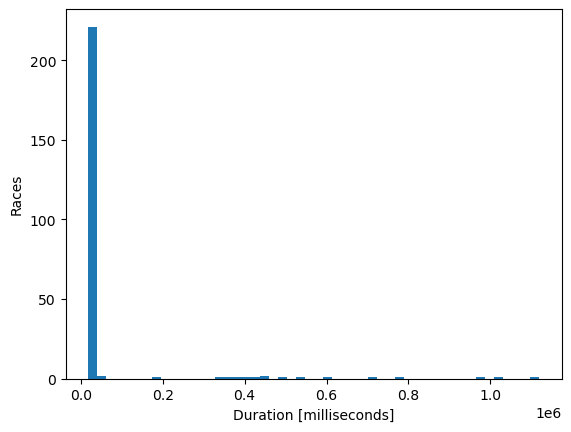

In [89]:
temp = pit_stops[["raceId", "milliseconds"]].groupby(["raceId"]).mean()
plt.hist(temp, bins=50)
plt.xlabel("Duration [milliseconds]")
plt.ylabel("Races")
plt.show()

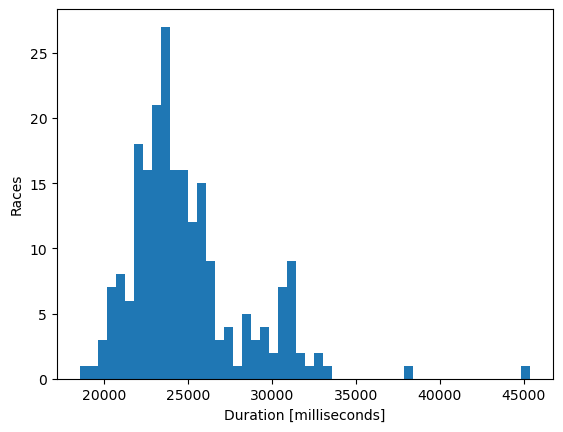

In [90]:
plt.hist(temp[temp["milliseconds"] < 50000], bins=50)
plt.xlabel("Duration [milliseconds]")
plt.ylabel("Races")
plt.show()

**We can use the pitstop data to complement the lap times data.**

### qualifying


In [91]:
print(qualifying.info())
qualifying.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9575 entries, 0 to 9574
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   qualifyId      9575 non-null   int64 
 1   raceId         9575 non-null   int64 
 2   driverId       9575 non-null   int64 
 3   constructorId  9575 non-null   int64 
 4   number         9575 non-null   int64 
 5   position       9575 non-null   int64 
 6   q1             9567 non-null   object
 7   q2             9424 non-null   object
 8   q3             9276 non-null   object
dtypes: int64(6), object(3)
memory usage: 673.4+ KB
None


,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236


##### races


In [92]:
print(races.info())
races.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1102 entries, 0 to 1101
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   raceId       1102 non-null   int64 
 1   year         1102 non-null   int64 
 2   round        1102 non-null   int64 
 3   circuitId    1102 non-null   int64 
 4   name         1102 non-null   object
 5   date         1102 non-null   object
 6   time         1102 non-null   object
 7   url          1102 non-null   object
 8   fp1_date     1102 non-null   object
 9   fp1_time     1102 non-null   object
 10  fp2_date     1102 non-null   object
 11  fp2_time     1102 non-null   object
 12  fp3_date     1102 non-null   object
 13  fp3_time     1102 non-null   object
 14  quali_date   1102 non-null   object
 15  quali_time   1102 non-null   object
 16  sprint_date  1102 non-null   object
 17  sprint_time  1102 non-null   object
dtypes: int64(4), object(14)
memory usage: 155.1+ KB
None


,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


##### results


In [93]:
print(results.info())
results.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25840 entries, 0 to 25839
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         25840 non-null  int64  
 1   raceId           25840 non-null  int64  
 2   driverId         25840 non-null  int64  
 3   constructorId    25840 non-null  int64  
 4   number           25840 non-null  object 
 5   grid             25840 non-null  int64  
 6   position         25840 non-null  object 
 7   positionText     25840 non-null  object 
 8   positionOrder    25840 non-null  int64  
 9   points           25840 non-null  float64
 10  laps             25840 non-null  int64  
 11  time             25840 non-null  object 
 12  milliseconds     25840 non-null  object 
 13  fastestLap       25840 non-null  object 
 14  rank             25840 non-null  object 
 15  fastestLapTime   25840 non-null  object 
 16  fastestLapSpeed  25840 non-null  object 
 17  statusId    

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


### seasons


In [94]:
print(seasons.info())
seasons.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    74 non-null     int64 
 1   url     74 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.3+ KB
None


,year,url
0,2009,http://en.wikipedia.org/wiki/2009_Formula_One_...
1,2008,http://en.wikipedia.org/wiki/2008_Formula_One_...
2,2007,http://en.wikipedia.org/wiki/2007_Formula_One_...
3,2006,http://en.wikipedia.org/wiki/2006_Formula_One_...
4,2005,http://en.wikipedia.org/wiki/2005_Formula_One_...


**This data is not very useful for now.**

### sprint_results


In [95]:
print(sprint_results.info())
sprint_results.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   resultId        120 non-null    int64 
 1   raceId          120 non-null    int64 
 2   driverId        120 non-null    int64 
 3   constructorId   120 non-null    int64 
 4   number          120 non-null    int64 
 5   grid            120 non-null    int64 
 6   position        120 non-null    object
 7   positionText    120 non-null    object
 8   positionOrder   120 non-null    int64 
 9   points          120 non-null    int64 
 10  laps            120 non-null    int64 
 11  time            120 non-null    object
 12  milliseconds    120 non-null    object
 13  fastestLap      120 non-null    object
 14  fastestLapTime  120 non-null    object
 15  statusId        120 non-null    int64 
dtypes: int64(10), object(6)
memory usage: 15.1+ KB
None


,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,fastestLapTime,statusId
0,1,1061,830,9,33,2,1,1,1,3,17,25:38.426,1538426,14,1:30.013,1
1,2,1061,1,131,44,1,2,2,2,2,17,+1.430,1539856,17,1:29.937,1
2,3,1061,822,131,77,3,3,3,3,1,17,+7.502,1545928,17,1:29.958,1
3,4,1061,844,6,16,4,4,4,4,0,17,+11.278,1549704,16,1:30.163,1
4,5,1061,846,1,4,6,5,5,5,0,17,+24.111,1562537,16,1:30.566,1


**Sprint races were introduced very recently in F1, to suplement the qualifying session.**

### status


In [96]:
print(status.info())
status.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   statusId  139 non-null    int64 
 1   status    139 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.3+ KB
None


,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine


**Status of each race result can be used to supplement data and visualizations for a given driver's career.**
